In [1]:
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.tools.monitor import job_monitor
import matplotlib as mpl
# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:

game_circuit = QuantumCircuit(2,1)

In [3]:
#game_circuit

game_circuit.clear()
game_circuit.h(0)
game_circuit.h(1)
game_circuit.cx(0,1)
game_circuit.h(1)
game_circuit.measure(1,0)


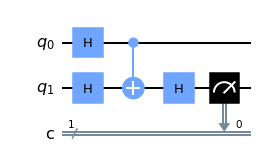

In [4]:
game_circuit.draw('mpl')

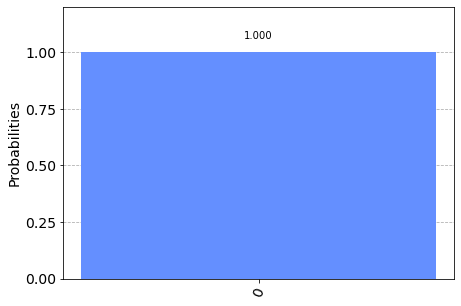

In [5]:
#running on ibm simulator

aer_sim=Aer.get_backend('aer_simulator')

shots=1024
qobj=assemble(game_circuit, shots=1024)

results=aer_sim.run(qobj).result()

counts=results.get_counts()
plot_histogram(counts)


In [6]:
#running on quantum computer
#signing in to ibm using api token

IBMQ.save_account('eb51948e03130da6b3212b337a0276eb3ddfb106e6e3ff49388aaf14efdded08d2624fa55f7d7158e02266b904d46424988e127c44056949754947d624319860')

configrc.store_credentials:WARNING:2023-05-29 00:06:16,419: Credentials already present. Set overwrite=True to overwrite.


In [7]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

In [ ]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 2 and not b.configuration().simulator and b.status().operational==True))
print(backend)
t_qc = transpile(game_circuit, backend, optimization_level=3)#transpile=assembling the circuit and everything
job = backend.run(t_qc)#backend means device
job_monitor(job)

ibmq_lima
Job Status: job is queued (None)

In [ ]:
exp_result = job.result()
exp_counts = exp_result.get_counts(game_circuit)
print(exp_counts)
plot_histogram(exp_counts)